# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import pickle
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
data=pd.read_csv('data.csv')
data

,Location,Latitude,Longitude,Elevation,Skycover,Orientation,Tilt,ACenergyPerYear,img
0,Ardabil,38.317,48.417,1332.0,6.031665,-45,0,267.981217,LocationArdabilAP_AR_IRN_Latitude38.317_Longit...
1,Ardabil,38.317,48.417,1332.0,6.031665,-35,0,289.396595,LocationArdabilAP_AR_IRN_Latitude38.317_Longit...
2,Ardabil,38.317,48.417,1332.0,6.031665,-25,0,309.203211,LocationArdabilAP_AR_IRN_Latitude38.317_Longit...
3,Ardabil,38.317,48.417,1332.0,6.031665,-15,0,324.975573,LocationArdabilAP_AR_IRN_Latitude38.317_Longit...
4,Ardabil,38.317,48.417,1332.0,6.031665,-5,0,334.305725,LocationArdabilAP_AR_IRN_Latitude38.317_Longit...
...,...,...,...,...,...,...,...,...,...
995,Kerman,30.274,56.951,1748.3,2.498567,-5,90,260.118802,LocationKermanIntlAP_KE_IRN_Latitude30.274_Lon...
996,Kerman,30.274,56.951,1748.3,2.498567,5,90,258.581072,LocationKermanIntlAP_KE_IRN_Latitude30.274_Lon...
997,Kerman,30.274,56.951,1748.3,2.498567,15,90,258.087367,LocationKermanIntlAP_KE_IRN_Latitude30.274_Lon...
998,Kerman,30.274,56.951,1748.3,2.498567,25,90,254.746498,LocationKermanIntlAP_KE_IRN_Latitude30.274_Lon...


# Visualize Data

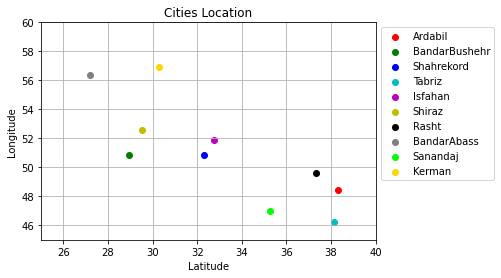

In [65]:
cities=data['Location'].unique()
Latitudes=data['Latitude'].unique()
Longitudes=data['Longitude'].unique()
colors=['r','g','b','c','m','y','k','gray','lime','gold']
for i in range(10):
    plt.scatter(Latitudes[i],Longitudes[i],color=colors[i])
plt.legend(cities,bbox_to_anchor=(1, 1))
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Cities Location')
plt.ylim(45, 60)
plt.xlim(25,40)
plt.savefig('CitesLocation.png',dpi=900,bbox_inches="tight")

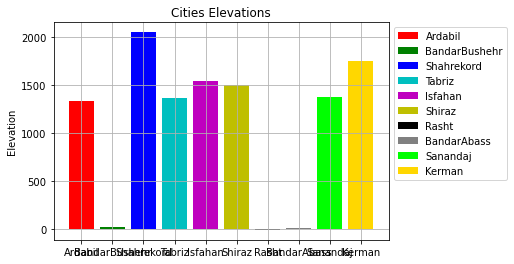

In [66]:
cities=data['Location'].unique()
Elevetions=data['Elevation'].unique()
colors=['r','g','b','c','m','y','k','gray','lime','gold']
for i in range(10):
    plt.bar(cities[i],Elevetions[i],color=colors[i])
plt.legend(cities,bbox_to_anchor=(1, 1))
plt.grid()
plt.ylabel('Elevation')
plt.title('Cities Elevations')
plt.savefig('CitesElevations.png',dpi=900,bbox_inches="tight")

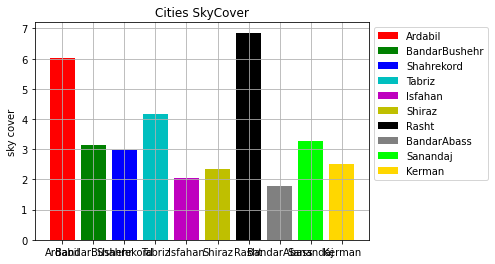

In [67]:
cities=data['Location'].unique()
Skycover=data['Skycover'].unique()
colors=['r','g','b','c','m','y','k','gray','lime','gold']
for i in range(10):
    plt.bar(cities[i],Skycover[i],color=colors[i])
plt.legend(cities,bbox_to_anchor=(1, 1))
plt.grid()
plt.ylabel('sky cover')
plt.title('Cities SkyCover')
plt.savefig('CitesSkycovers.png',dpi=900,bbox_inches="tight")

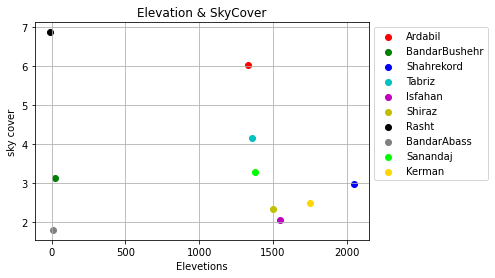

In [68]:
Elevetions=data['Elevation'].unique()
Skycover=data['Skycover'].unique()
colors=['r','g','b','c','m','y','k','gray','lime','gold']
for i in range(10):
    plt.scatter(Elevetions[i],Skycover[i],color=colors[i])
plt.legend(cities,bbox_to_anchor=(1, 1))
plt.grid()
plt.xlabel('Elevetions')
plt.ylabel('sky cover')
plt.title('Elevation & SkyCover')
plt.savefig('SkyCover&Elevation.png',dpi=900,bbox_inches="tight")

# Remove Unessensial Features

In [193]:
data=data.drop(['Location','img'],1)
data.head()

,Latitude,Longitude,Elevation,Skycover,Orientation,Tilt,ACenergyPerYear
0,38.317,48.417,1332.0,6.031665,-45,0,267.981217
1,38.317,48.417,1332.0,6.031665,-35,0,289.396595
2,38.317,48.417,1332.0,6.031665,-25,0,309.203211
3,38.317,48.417,1332.0,6.031665,-15,0,324.975573
4,38.317,48.417,1332.0,6.031665,-5,0,334.305725


In [70]:
#extract data describe to excel human readable file
data.describe().to_excel('DataDescription.xlsx')

# Linear Regression algorithm

In [71]:
#define features as X and target as y
prediction='ACenergyPerYear'
X=np.array(data.drop([prediction],1))
y=np.array(data[prediction])

In [72]:
#split data to test and train
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.8)

In [73]:
#define model
linear=linear_model.LinearRegression()

In [74]:
#fit model
linear.fit(X_train,y_train)

LinearRegression()

In [75]:
#accuracy score
acc=linear.score(X_test,y_test)
acc

0.6025435189553865

In [76]:
#find the best model
BestAcc=0
Acc=[]
testsize=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for j in range(len(testsize)):
    X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=testsize[j])
    linear.fit(X_train,y_train)
    acc=linear.score(X_test,y_test)
    Acc.append(acc)
    if acc>BestAcc:
        BestAcc=acc
BestAcc

0.6851442742857591

In [77]:
dfscore=pd.DataFrame()
dfscore['testsize']=testsize
dfscore['accuracy']=Acc

In [78]:
dfscore

,testsize,accuracy
0,0.1,0.685144
1,0.2,0.643690
2,0.3,0.638764
3,0.4,0.602740
4,0.5,0.604901
5,0.6,0.609867
6,0.7,0.590175
7,0.8,0.582885
8,0.9,0.548210


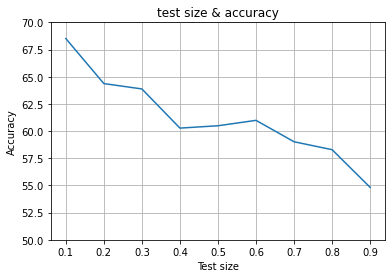

In [79]:
plt.plot(dfscore['testsize'],dfscore['accuracy']*100)
plt.xlabel('Test size')
plt.ylabel('Accuracy')
plt.title('test size & accuracy')
plt.grid()
plt.ylim(50, 70)
plt.savefig('testsize&accuracy.png',dpi=900,bbox_inches="tight")

In [32]:
BestAcc=0
Acclist=[]
forlist=[]
for i in range(1000000):
    X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.1)
    linear.fit(X_train,y_train)
    acc=linear.score(X_test,y_test)
    Acclist.append(acc)
    forlist.append(i)
    if acc>BestAcc:
        BestAcc=acc
        with open('Photovoltaic_prediction.pickle','wb') as pre:
            pickle.dump(linear,pre)
BestAcc

KeyboardInterrupt: 

In [80]:
plt.figure(figsize=(90, 10))
plt.plot(forlist,Acclist)
plt.savefig('accuracy.png')

NameError: name 'forlist' is not defined

<Figure size 6480x720 with 0 Axes>

In [81]:
PV_Model=pickle.load(open('Photovoltaic_prediction.pickle','rb'))
datacoef=pd.DataFrame()
arr = np.array(PV_Model.coef_)
coeflist=arr.tolist()
abscoeflilst=[]
for i in coeflist:
    abscoeflilst.append(abs(i))
datacoef['Coeficient']=abscoeflilst
datacoef['Feature']=['Latitude','Longitude','Elevation','Skycover','Orientation','Tilt']
datacoef
datacoef.to_excel('DataCoef.xlsx')

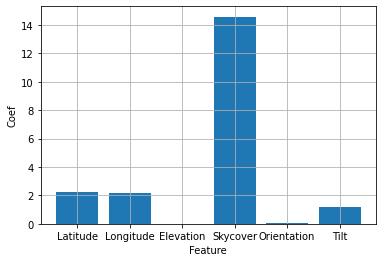

In [82]:
plt.bar(datacoef['Feature'],datacoef['Coeficient'])
plt.grid()
plt.xlabel('Feature')
plt.ylabel('Coef')
plt.savefig('featurecoef.png',dpi=300)

In [83]:
PV_Model.intercept_

604.0506599244812

In [84]:
#test
testlist=[34.85,48.533,1749,3.36758,0,40]
result=PV_Model.predict([testlist])
result

array([358.86822217])

# Visualize

In [85]:
data

,Latitude,Longitude,Elevation,Skycover,Orientation,Tilt,ACenergyPerYear
0,38.317,48.417,1332.0,6.031665,-45,0,267.981217
1,38.317,48.417,1332.0,6.031665,-35,0,289.396595
2,38.317,48.417,1332.0,6.031665,-25,0,309.203211
3,38.317,48.417,1332.0,6.031665,-15,0,324.975573
4,38.317,48.417,1332.0,6.031665,-5,0,334.305725
...,...,...,...,...,...,...,...
995,30.274,56.951,1748.3,2.498567,-5,90,260.118802
996,30.274,56.951,1748.3,2.498567,5,90,258.581072
997,30.274,56.951,1748.3,2.498567,15,90,258.087367
998,30.274,56.951,1748.3,2.498567,25,90,254.746498


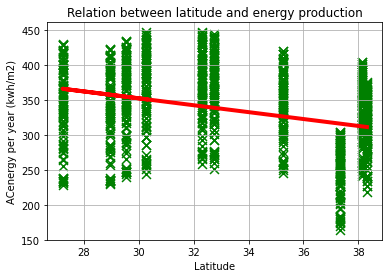

In [86]:
x=data.Latitude
y=data.ACenergyPerYear
stats=linregress(x,y)
m=stats.slope
b=stats.intercept
plt.scatter(x,y,marker='x',color='green',s=80)
#scatter:represent points
plt.plot(x,m*x+b , color='red',linewidth=4)
#plot.represent line
#plt.figure(figsize=(10,10))
#labeling
plt.xlabel('Latitude',fontsize=10)
plt.ylabel('ACenergy per year (kwh/m2)',fontsize=10)
plt.title('Relation between latitude and energy production')
plt.grid()
plt.savefig('Latitude&energy.png',dpi=300)

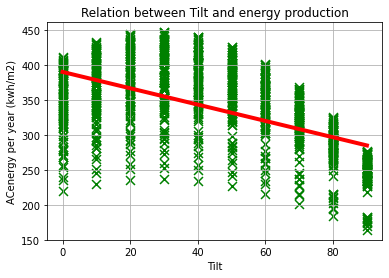

In [87]:
x=data.Tilt
y=data.ACenergyPerYear
stats=linregress(x,y)
m=stats.slope
b=stats.intercept
plt.scatter(x,y,marker='x',color='green',s=80)
#scatter:represent points
plt.plot(x,m*x+b , color='red',linewidth=4)
#plot.represent line
#plt.figure(figsize=(10,10))
#labeling
plt.xlabel('Tilt',fontsize=10)
plt.ylabel('ACenergy per year (kwh/m2)',fontsize=10)
plt.title('Relation between Tilt and energy production')
plt.grid()
plt.savefig('Tilt&energy.png',dpi=300)

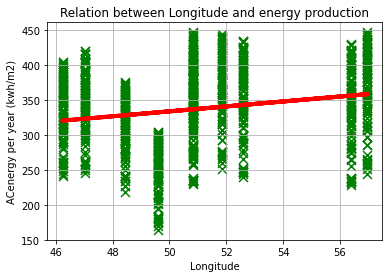

In [88]:
x=data.Longitude
y=data.ACenergyPerYear
stats=linregress(x,y)
m=stats.slope
b=stats.intercept
plt.scatter(x,y,marker='x',color='green',s=80)
#scatter:represent points
plt.plot(x,m*x+b , color='red',linewidth=4)
#plot.represent line
#plt.figure(figsize=(10,10))
#labeling
plt.xlabel('Longitude',fontsize=10)
plt.ylabel('ACenergy per year (kwh/m2)',fontsize=10)
plt.title('Relation between Longitude and energy production')
plt.grid()
plt.savefig('Longitude&energy.png',dpi=300)

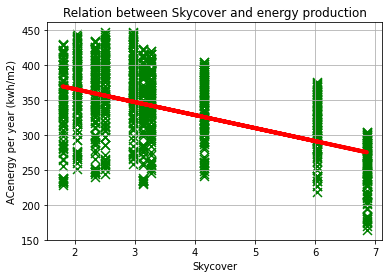

In [89]:
x=data.Skycover
y=data.ACenergyPerYear
stats=linregress(x,y)
m=stats.slope
b=stats.intercept
plt.scatter(x,y,marker='x',color='green',s=80)
#scatter:represent points
plt.plot(x,m*x+b , color='red',linewidth=4)
#plot.represent line
#plt.figure(figsize=(10,10))
#labeling
plt.xlabel('Skycover',fontsize=10)
plt.ylabel('ACenergy per year (kwh/m2)',fontsize=10)
plt.title('Relation between Skycover and energy production')
plt.grid()
plt.savefig('Skycover&energy.png',dpi=300)

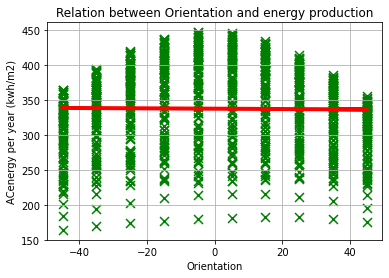

In [90]:
x=data.Orientation
y=data.ACenergyPerYear
stats=linregress(x,y)
m=stats.slope
b=stats.intercept
plt.scatter(x,y,marker='x',color='green',s=80)
#scatter:represent points
plt.plot(x,m*x+b , color='red',linewidth=4)
#plot.represent line
#plt.figure(figsize=(10,10))
#labeling
plt.xlabel('Orientation',fontsize=10)
plt.ylabel('ACenergy per year (kwh/m2)',fontsize=10)
plt.title('Relation between Orientation and energy production')
plt.grid()
plt.savefig('Orientation&energy.png',dpi=300)

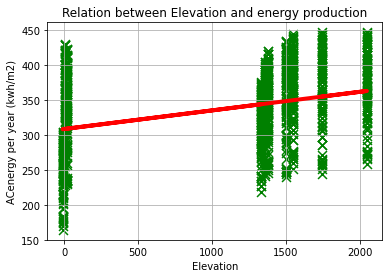

In [91]:
x=data.Elevation
y=data.ACenergyPerYear
stats=linregress(x,y)
m=stats.slope
b=stats.intercept
plt.scatter(x,y,marker='x',color='green',s=80)
#scatter:represent points
plt.plot(x,m*x+b , color='red',linewidth=4)
#plot.represent line
#plt.figure(figsize=(10,10))
#labeling
plt.xlabel('Elevation',fontsize=10)
plt.ylabel('ACenergy per year (kwh/m2)',fontsize=10)
plt.title('Relation between Elevation and energy production')
plt.grid()
plt.savefig('Elevation&energy.png',dpi=300)

# Comparison results

In [92]:
sample=[]
for i in range(100):
    sample.append(i)

In [93]:
result=linear.predict(X_test)

In [94]:
result

array([352.75757781, 354.80454573, 306.24662566, 303.63046955,
       301.55853805, 377.84638292, 309.84626405, 414.32769714,
       226.24471759, 395.78365306, 331.84902135, 352.68999596,
       326.50699001, 353.67395925, 340.13674735, 387.36702492,
       418.47156015, 383.1208324 , 269.192417  , 384.09178495,
       344.41932551, 330.69347129, 323.24880561, 379.91831442,
       374.72913889, 328.62153979, 320.93938762, 295.23877604,
       285.95711046, 328.2857686 , 337.20184667, 358.29964458,
       363.18322848, 304.18127983, 257.70217301, 309.44914364,
       298.90024468, 318.16359758, 320.39516301, 341.53495112,
       329.915805  , 420.89641184, 366.58737059, 329.65384156,
       305.70240105, 320.23552908, 365.32788198, 320.43715321,
       374.93543591, 318.28684586, 359.88975376, 345.99839276,
       402.05978688, 319.9980426 , 352.40342871, 326.54960829,
       346.47420145, 319.10494261, 372.80316509, 364.28420744,
       354.47536021, 321.56773968, 246.21192903, 280.07

In [95]:
y_test

array([422.40489 , 361.807992, 330.231185, 262.247768, 262.814839,
       359.444095, 258.079017, 395.825813, 204.905557, 316.456952,
       354.633966, 370.674006, 290.604478, 365.922918, 334.176317,
       414.119075, 340.444684, 390.649724, 299.830767, 376.186034,
       244.013382, 276.797353, 259.177832, 330.607764, 420.976137,
       275.76101 , 362.970035, 233.481854, 296.21511 , 356.989269,
       328.218345, 333.595542, 363.474184, 369.569651, 299.123577,
       374.871485, 297.98623 , 306.303573, 343.60629 , 358.250987,
       250.900949, 403.604623, 421.394   , 352.252178, 260.896661,
       316.152656, 290.445573, 259.109348, 348.561722, 297.10485 ,
       328.918903, 387.34784 , 433.507254, 307.089763, 294.713555,
       272.932787, 418.363385, 268.688446, 392.937645, 409.041355,
       315.912864, 331.147061, 284.495718, 259.246195, 354.849186,
       424.226034, 407.644662, 251.517326, 298.245068, 379.933423,
       329.909218, 362.275634, 401.266569, 260.891853, 361.941

In [96]:
X_test[1]

array([  32.297  ,   50.842  , 2049.2    ,    2.96312,  -35.     ,
         60.     ])

ValueError: x and y must have same first dimension, but have shapes (100,) and (900,)

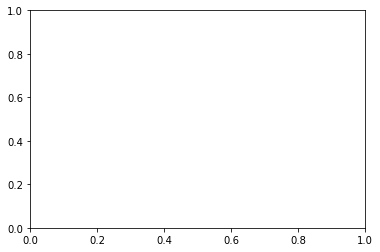

In [97]:
Actual=y_test
predicted=result
plt.plot(sample,Actual)
plt.plot(sample,predicted,color='red')
plt.legend(['Actual','predicted'])
plt.xlabel('sample')
plt.ylabel('ACenergyPerYear kwh/m2')
plt.grid()
plt.title('Comparison between Actual and predicted results')
plt.savefig('Comparison.png',dpi=300)

In [100]:
linear.coef_

array([-8.70650704, -4.80808881,  0.02967354, -6.47298468,  0.20719315,
       -0.94183125])

# k-nearest neighbors algorithm

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [114]:
data

,Latitude,Longitude,Elevation,Skycover,Orientation,Tilt,ACenergyPerYear
0,38.317,48.417,1332.0,6.031665,-45,0,267.981217
1,38.317,48.417,1332.0,6.031665,-35,0,289.396595
2,38.317,48.417,1332.0,6.031665,-25,0,309.203211
3,38.317,48.417,1332.0,6.031665,-15,0,324.975573
4,38.317,48.417,1332.0,6.031665,-5,0,334.305725
...,...,...,...,...,...,...,...
995,30.274,56.951,1748.3,2.498567,-5,90,260.118802
996,30.274,56.951,1748.3,2.498567,5,90,258.581072
997,30.274,56.951,1748.3,2.498567,15,90,258.087367
998,30.274,56.951,1748.3,2.498567,25,90,254.746498


In [115]:
data.describe()

,Latitude,Longitude,Elevation,Skycover,Orientation,Tilt,ACenergyPerYear
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,33.004700,51.072400,1092.760000,3.508085,0.000000,45.000000,337.362954
std,3.851903,3.390699,740.292278,1.613040,28.737185,28.737185,60.023406
min,27.218000,46.235000,-12.200000,1.796619,-45.000000,0.000000,164.014553
25%,29.539000,48.417000,20.700000,2.335595,-25.000000,20.000000,293.097438
50%,32.524000,50.838500,1368.700000,3.050507,0.000000,45.000000,343.597690
75%,37.325000,52.589000,1545.900000,4.151495,25.000000,70.000000,385.784373
max,38.317000,56.951000,2049.200000,6.859957,45.000000,90.000000,446.683693


In [194]:
conditions=[
    (data['ACenergyPerYear']<=293),
    (data['ACenergyPerYear']>293) & (data['ACenergyPerYear']<=343),
    (data['ACenergyPerYear']>343) & (data['ACenergyPerYear']<=385),
    (data['ACenergyPerYear']>385)
]
#value describe = [bad,mid,good,best]
values=[0,1,2,3]

In [195]:
data['condition']=np.select(conditions,values)

In [196]:
data

,Latitude,Longitude,Elevation,Skycover,Orientation,Tilt,ACenergyPerYear,condition
0,38.317,48.417,1332.0,6.031665,-45,0,267.981217,0
1,38.317,48.417,1332.0,6.031665,-35,0,289.396595,0
2,38.317,48.417,1332.0,6.031665,-25,0,309.203211,1
3,38.317,48.417,1332.0,6.031665,-15,0,324.975573,1
4,38.317,48.417,1332.0,6.031665,-5,0,334.305725,1
...,...,...,...,...,...,...,...,...
995,30.274,56.951,1748.3,2.498567,-5,90,260.118802,0
996,30.274,56.951,1748.3,2.498567,5,90,258.581072,0
997,30.274,56.951,1748.3,2.498567,15,90,258.087367,0
998,30.274,56.951,1748.3,2.498567,25,90,254.746498,0


In [119]:
#choosing prediction parameter as target and drop unessiential parameter
prediction='condition'
X=np.array(data.drop(['ACenergyPerYear',prediction],1))
#define features
y=np.array(data[prediction])
#data split
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.2)
#define number of neighbors as n_neighbors
Knn=KNeighborsClassifier(n_neighbors=7)

In [120]:
#train and fit model with train data
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [121]:
y_pred=Knn.predict(X_test)

In [122]:
Knn_score=metrics.accuracy_score(y_test,y_pred)

In [123]:
Knn_score

0.725

In [137]:
scorelist=[]
bestscore=0
besttestsize=0
bestneighbor=0
testsizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
neighbors=[1,2,3,4,5,6,7,8,9,10]
for i in range (1000):
    for i in range(len(testsizes)):
        X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=testsizes[i])
        for j in range(len(neighbors)):
            Knn=KNeighborsClassifier(n_neighbors=neighbors[j])
            Knn.fit(X_train,y_train)
            y_pred=Knn.predict(X_test)
            Knn_score=metrics.accuracy_score(y_test,y_pred)
            scorelist.append(Knn_score)
            if Knn_score>bestscore:
                with open('Photovoltaic_prediction_knn.pickle','wb') as pre:
                    pickle.dump(Knn,pre)
                bestscore=Knn_score
                besttestsize=testsizes[i]
                bestneighbor=neighbors[j]

In [138]:
bestscore

0.9

In [139]:
besttestsize

0.1

In [140]:
bestneighbor

4

In [141]:
testlist=[]
for k in range(1000):
    for i in range(len(testsizes)):
        for j in range(len(neighbors)):
            testlist.append(str(testsizes[i])+' | '+str(neighbors[j]))

In [142]:
scoredf=pd.DataFrame()
scoredf['score']=scorelist
scoredf['TS & Nei']=testlist

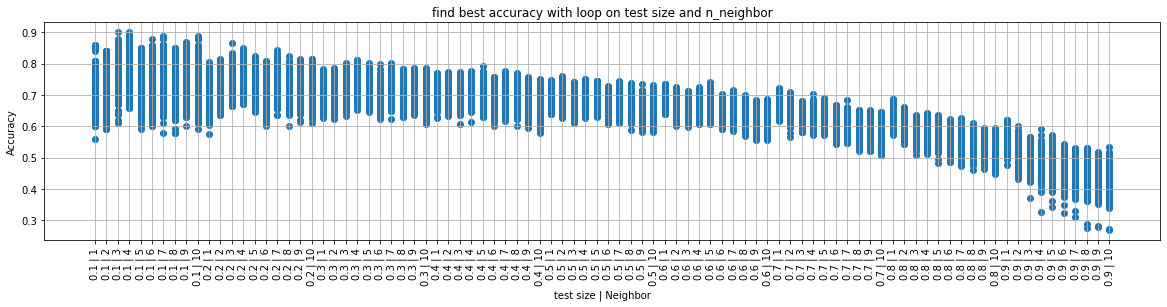

In [144]:
plt.figure(figsize=(20,4))
plt.scatter(scoredf['TS & Nei'],scoredf['score'])
plt.xticks(rotation = 90)
plt.xlabel('test size | Neighbor')
plt.ylabel('Accuracy')
plt.title('find best accuracy with loop on test size and n_neighbor')
plt.grid()
plt.savefig('Knncomparison.png',dpi=600)

In [164]:
#load Knn model and chech it with X_test
Knn_PV_Model=pickle.load(open('Photovoltaic_prediction_knn.pickle','rb'))
y_pred=Knn_PV_Model.predict(X_test)

In [167]:
list1=[]
for i in range(900):
    list1.append(i)
dfcheck=pd.DataFrame()
dfcheck['count']=list1
dfcheck['y_pred']=y_pred
dfcheck['y_test']=y_test
dfcheck=dfcheck.head(300)

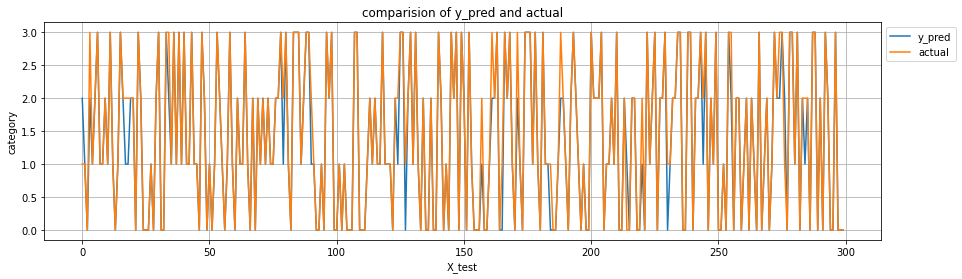

In [168]:
plt.figure(figsize=(15,4))
plt.plot(dfcheck['count'],dfcheck['y_pred'])
plt.plot(dfcheck['count'],dfcheck['y_test'])
plt.legend(['y_pred','actual'],bbox_to_anchor=(1, 1))
plt.grid()
plt.ylabel('category')
plt.xlabel('X_test')
plt.title('comparision of y_pred and actual')
plt.savefig('comparisonforknn.png',dpi=900,bbox_inches="tight")

In [159]:
list2=[]
for i in range(len(y_pred)):
    list2.append([y_pred[i],y_test[i]])
list2
counter=0
for i in range(len(list2)):
    if list2[i][0]==list2[i][1]:
        counter+=1
counter
print(1-(len(list2)-counter)/len(list2))

0.9066666666666666


In [174]:
from sklearn.metrics import mean_squared_error
rmsd = mean_squared_error(y_test, y_pred)

In [175]:
rmsd

0.09333333333333334

In [176]:
from math import sqrt
rmsd = sqrt(mean_squared_error(y_test, y_pred))

In [178]:
rmsd

0.30550504633038933

# SVM

In [197]:
from sklearn.svm import SVC

In [198]:
data

,Latitude,Longitude,Elevation,Skycover,Orientation,Tilt,ACenergyPerYear,condition
0,38.317,48.417,1332.0,6.031665,-45,0,267.981217,0
1,38.317,48.417,1332.0,6.031665,-35,0,289.396595,0
2,38.317,48.417,1332.0,6.031665,-25,0,309.203211,1
3,38.317,48.417,1332.0,6.031665,-15,0,324.975573,1
4,38.317,48.417,1332.0,6.031665,-5,0,334.305725,1
...,...,...,...,...,...,...,...,...
995,30.274,56.951,1748.3,2.498567,-5,90,260.118802,0
996,30.274,56.951,1748.3,2.498567,5,90,258.581072,0
997,30.274,56.951,1748.3,2.498567,15,90,258.087367,0
998,30.274,56.951,1748.3,2.498567,25,90,254.746498,0


In [204]:
svc=SVC()
#choosing prediction parameter as target and drop unessiential parameter
prediction='condition'
X=np.array(data.drop(['ACenergyPerYear',prediction],1))
#define features
y=np.array(data[prediction])
#split data to test and train
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.8)

In [205]:
svc.fit(X_train,y_train)

SVC()

In [206]:
svc.score(X_test,y_test)

0.3175